# EDA of Facies Mark dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# dataset path 
volume = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/clean/faciesmark/raw/seismic_entire_volume.npy'
labels = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/clean/faciesmark/raw/labels_entire_volume.npy'

In [3]:
volume_npy = np.load(volume)
labels_npy = np.load(labels)

In [4]:
volume_npy.shape

(599, 901, 255)

It is a 3d cube containing 255 two way time samples of 901 xlines corresponding to 601 inlines. 
In comparison with F3 interpretation dataset which has 651 inlines, 951 xlines and 462 time samples, this dataset is trimmed version where the near surface data gaps have been cleaned.

In [5]:
labels_npy.shape

(599, 901, 255)

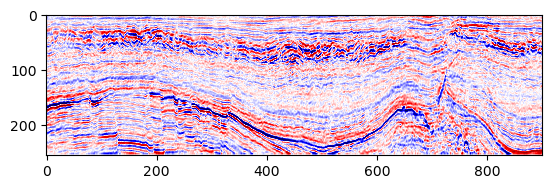

In [6]:
# sample iline 

plt.imshow(volume_npy[0].T, cmap='seismic')

In [27]:
# global statistics
np.max(volume_npy) , np.min(volume_npy) , np.mean(volume_npy), np.std(volume_npy), np.quantile(np.abs(volume_npy), 0.99), np.median(volume_npy)

(1.0,
 -1.0,
 0.0017854898587952805,
 0.2110130278058498,
 0.759497063116162,
 0.006975908663622733)

In [8]:
labels = np.unique(labels_npy).tolist()
labels

[0, 1, 2, 3, 4, 5]

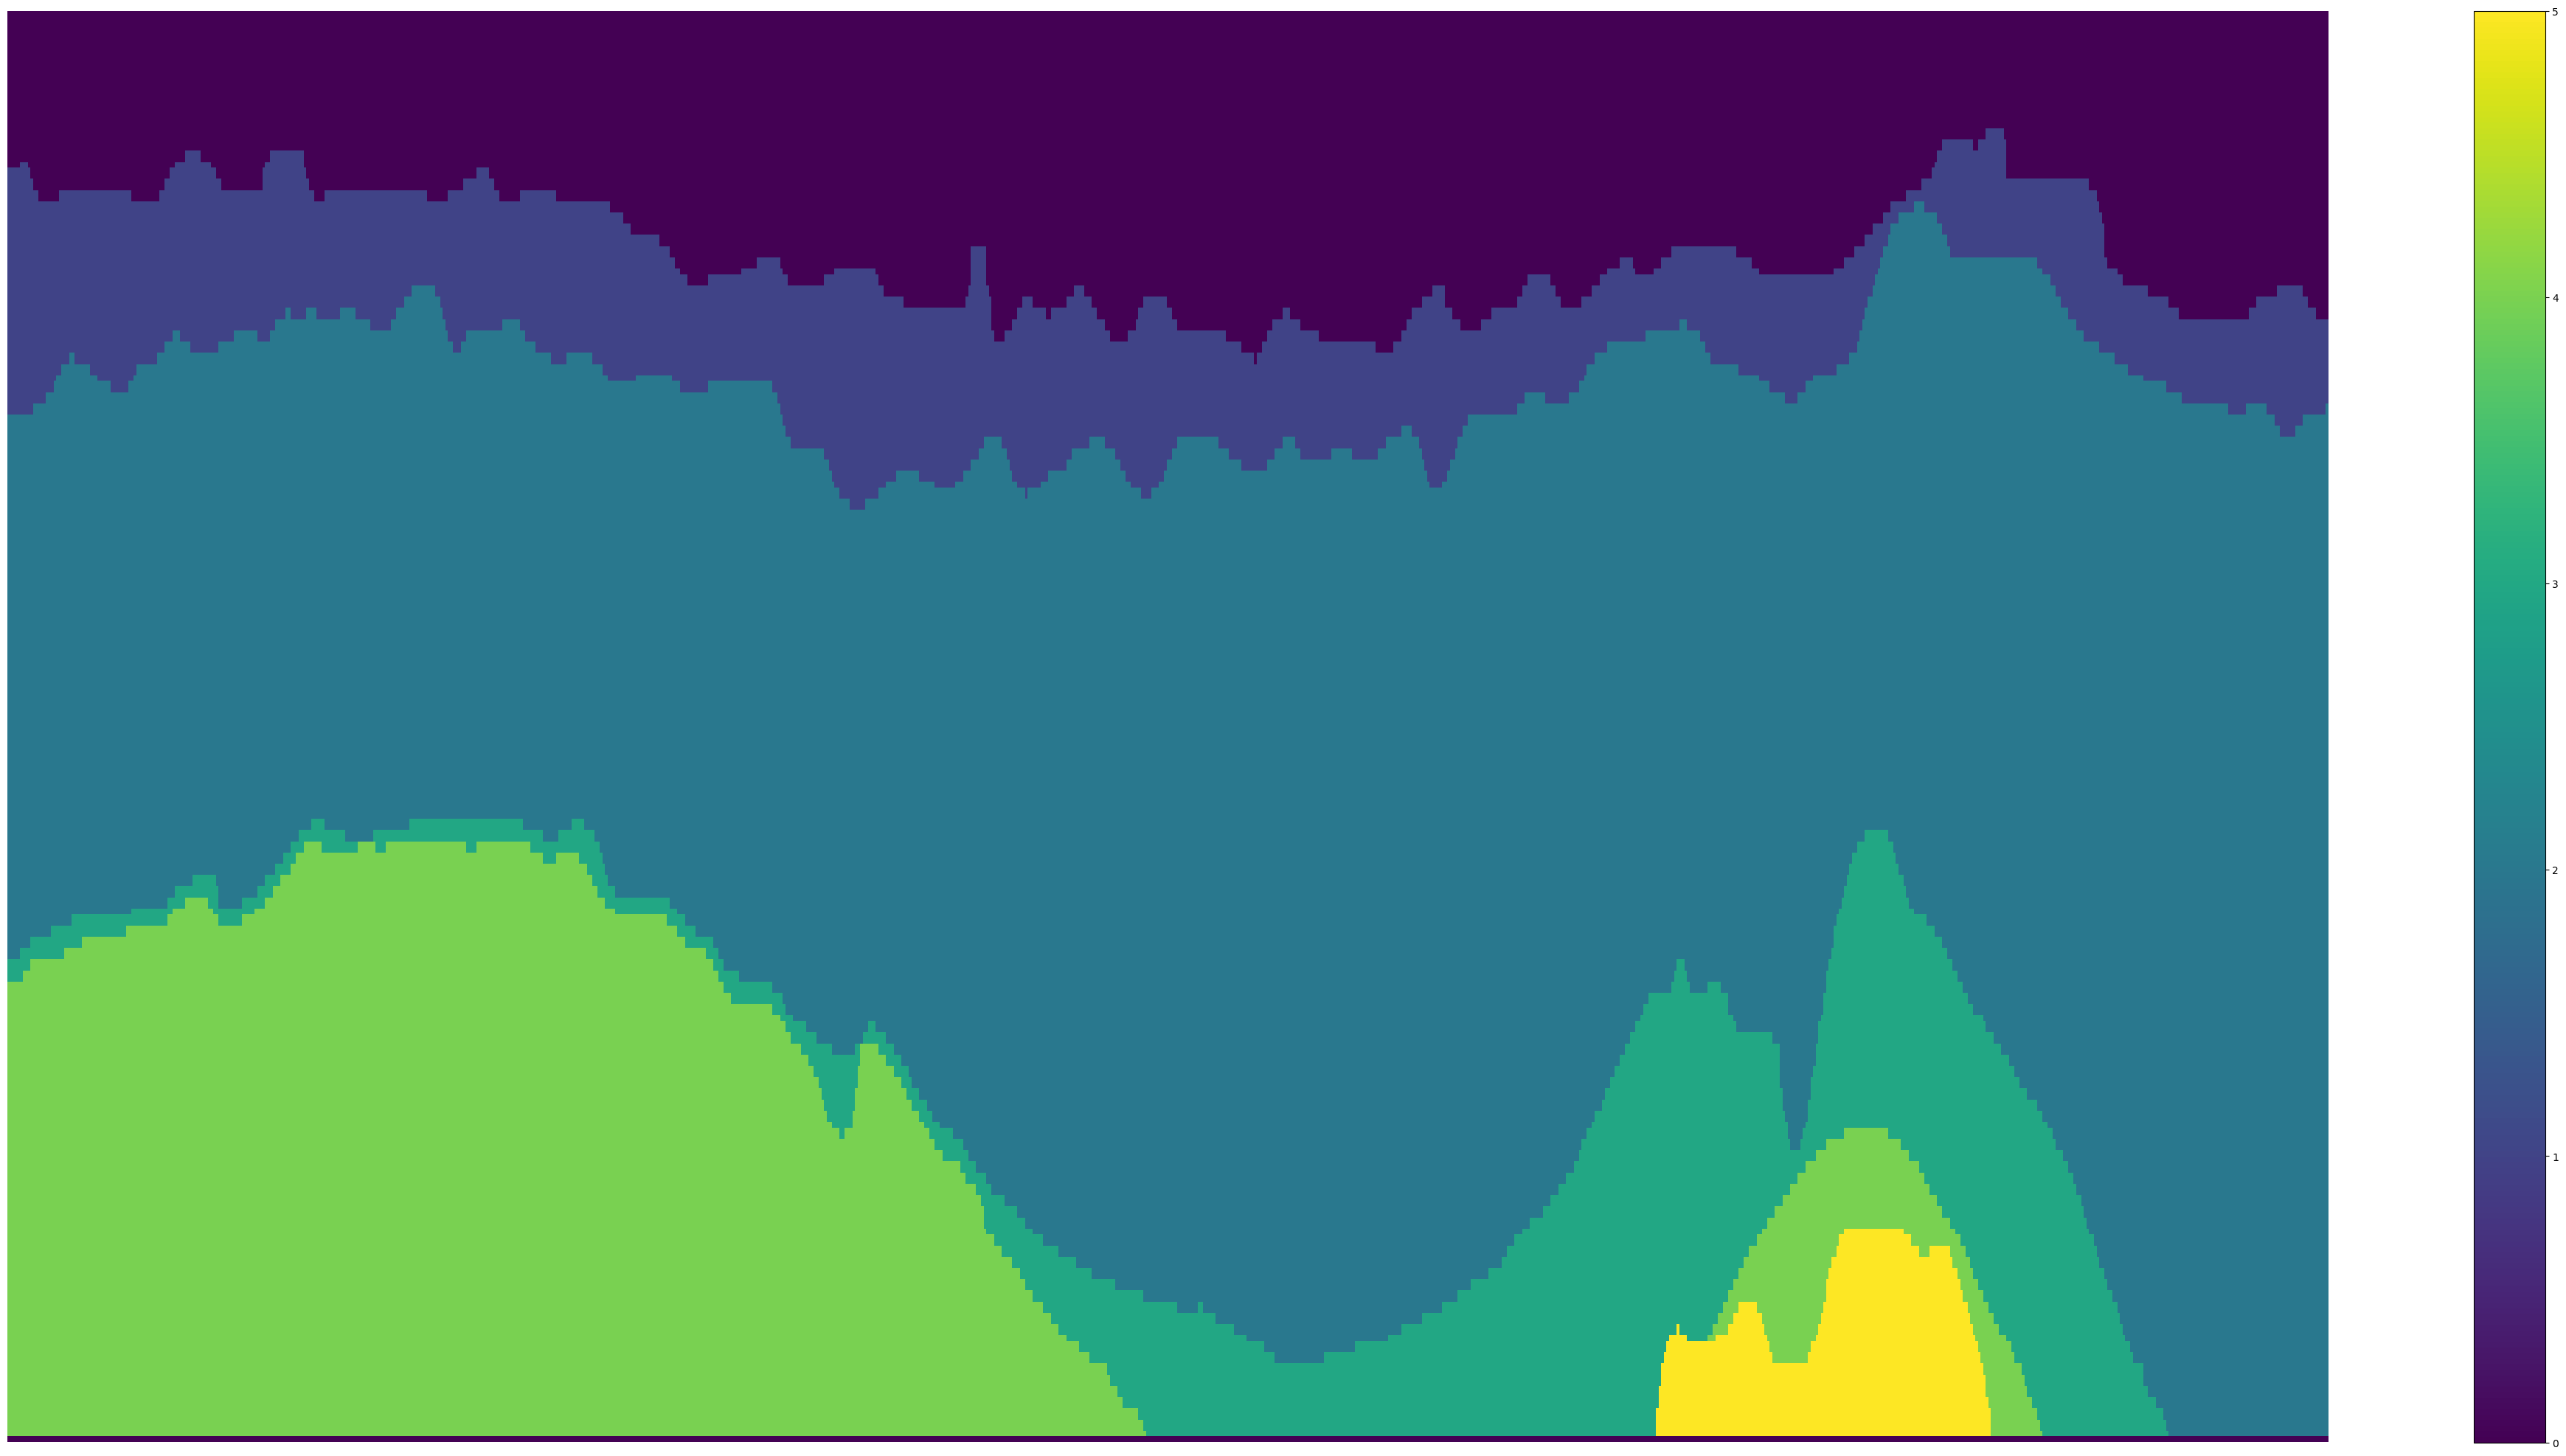

In [9]:
# sample labels 
plt.figure(figsize=(40,20))
plt.imshow(labels_npy[0].T,aspect='auto')
plt.colorbar()
plt.tight_layout()
plt.axis('off')
plt.show()

Class label :0 Count : 34792710
Class label :1 Count : 15046176
Class label :2 Count : 68112109
Class label :3 Count : 8634886
Class label :4 Count : 8535595
Class label :5 Count : 2501769


Text(0.5, 1.0, 'Distribution of Labels')

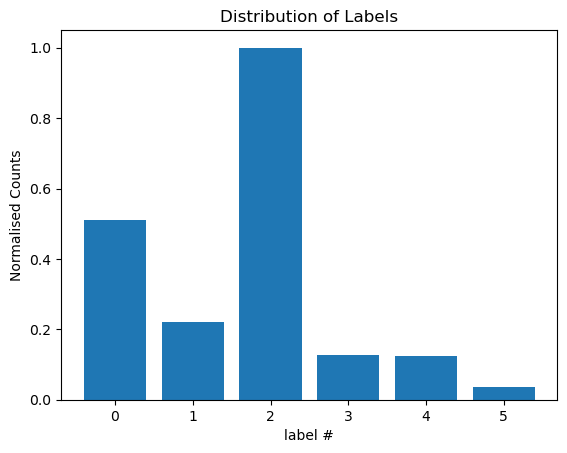

In [10]:
# Distribution of class labels 
counts = []
for label in labels : 
    count = labels_npy[labels_npy == label].shape[0]
    print(f'Class label :{label}','Count :', count )
    counts.append(count)
    
normalised_counts = [x / max(counts) for x in counts]
plt.bar(labels, normalised_counts, )
plt.xlabel('label #')
plt.ylabel('Normalised Counts')
plt.title("Distribution of Labels")

In [11]:
counts

[34792710, 15046176, 68112109, 8634886, 8535595, 2501769]

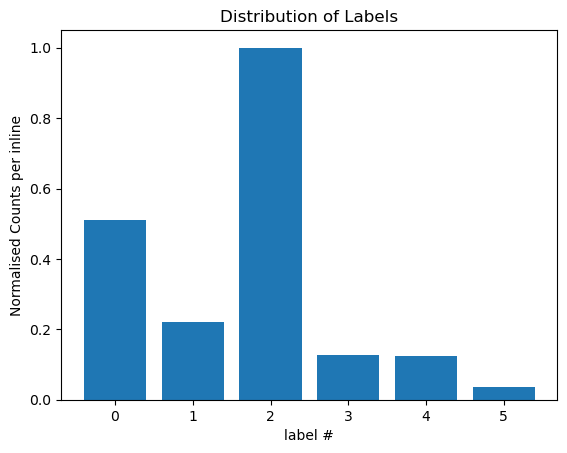

In [12]:
# Mean Distribution of classes in an a typical inline ( class coverage )
# i.e total count by inline image size 
mean_counts_inline = [x / volume_npy.shape[0] / volume_npy.shape[1] for x in counts ]
mean_counts_inline_normalised = [ x / max(mean_counts_inline) for x in mean_counts_inline]

plt.bar(labels, mean_counts_inline_normalised, )
plt.xlabel('label #')
plt.ylabel('Normalised Counts per inline')
plt.title("Distribution of Labels");

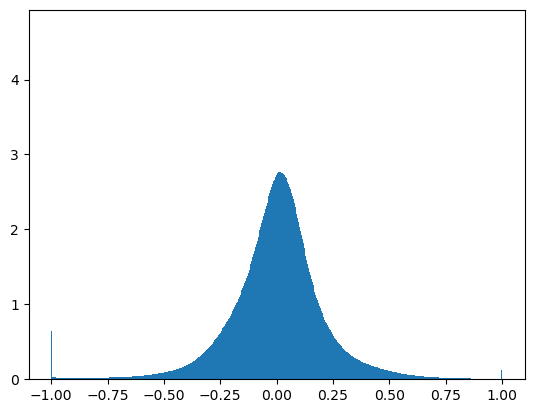

In [13]:
# distrbution of data 
plt.figure('Data Probability Distribution')
plt.hist(volume_npy.reshape(-1), bins=500,density=True)
plt.show()

Although distribution of data looks gaussian, there is an order of difference between mean and median of the data.  
Abnormal density at -1 and 1 indicate that the data has been clipped to remove outliers. 

(599, 901, 255) [0 1]


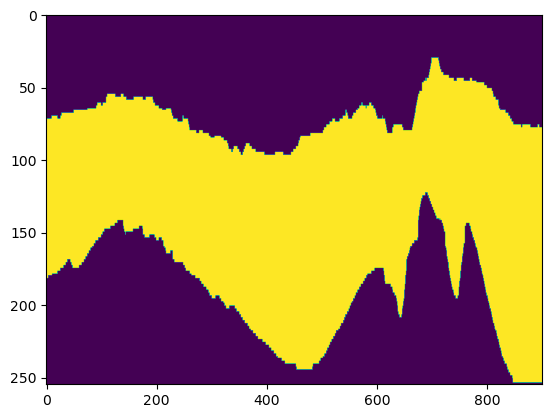

In [14]:
# selecting data of each class 
from copy import deepcopy 

def class_mask(label_npy, label) :
    label_npy = deepcopy(label_npy)
    condition = (label_npy == label)
    label_npy[condition] = 1 
    label_npy[~condition] = 0
    return label_npy

# sample plot 

label = 2

label_mask = class_mask(labels_npy, label)
print(label_mask.shape,np.unique(label_mask))
plt.imshow(label_mask[100].T, aspect='auto')

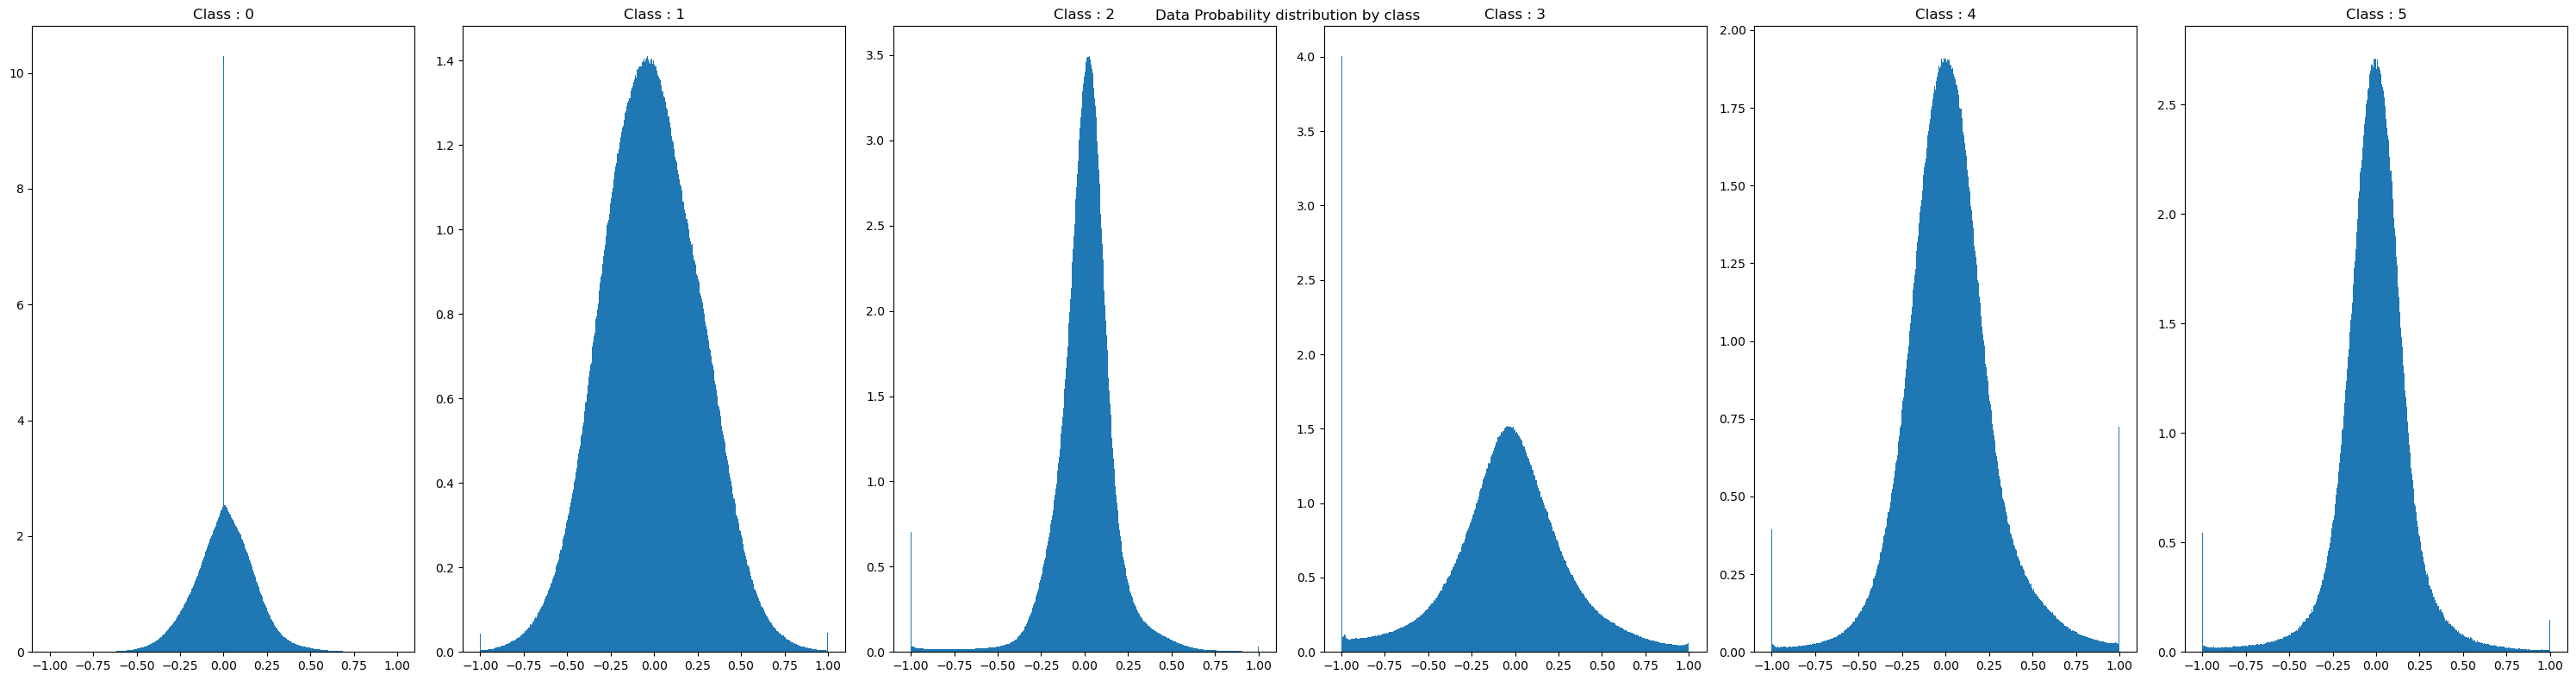

In [15]:
# distribution of data in each class

# data filtered by class 
label = 2
def data_by_class(volume_npy, label_npy, label) : 
    label_mask = class_mask(labels_npy, label)
    positions = np.where(label_mask == 1)
    return volume_npy[positions]

# data distribution by class

fig, ax = plt.subplots(ncols=6, figsize=(30,8))
for label in labels : 
    volume = data_by_class(volume_npy, labels_npy, label)
    ax[label].hist(volume, bins=500, density=True)
    ax[label].set_title(f'Class : {label}')

plt.tight_layout()
plt.suptitle('Data Probability distribution by class')
plt.show()

In [16]:
# train , test split 
train_volume_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train/train_seismic.npy'
train_labels_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train/train_labels.npy'

test_1_volume_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test_once/test1_seismic.npy'
test_1_label_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test_once/test1_labels.npy'

test_2_volume_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test_once/test2_seismic.npy'
test_2_label_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test_once/test2_labels.npy'

In [17]:
# Train dataset shape 
train_vol = np.load(train_volume_path)
train_vol.shape , np.min(train_vol), np.max(train_vol), np.mean(train_vol)

((401, 701, 255), -1.0, 1.0, 0.0009996710808862074)

In [18]:
# Test dataset 1 shape 
test1_vol = np.load(test_1_volume_path)
test1_vol.shape , np.min(test1_vol), np.max(test1_vol), np.mean(test1_vol)

((200, 701, 255), -1.0, 1.0, 0.003114432754546324)

In [19]:
# Test dataset 2 shape 
test2_vol = np.load(test_2_volume_path)
test2_vol.shape , np.min(test2_vol), np.max(test2_vol), np.mean(test2_vol)

((601, 200, 255), -1.0, 1.0, 0.0023279270469972217)

In [20]:
import os 

def patch_index_generation(dataset_path, patchsize, stride, info_path, mode = '2d') : 
    
    if not os.path.exists(dataset_path) :
        print(f'{info_path} provided for patch gen does not exist')
        return
    dataset = np.load(dataset_path)

    # exit if info_path already exists 
    if os.path.exists(info_path) : 
        print("Patch index already exists")
        return
    else : 
        # generate patches 
        n_ilines, n_xlines, n_twt = dataset.shape
        print(n_ilines, n_xlines, n_twt)
    
        patch_info_file = open(info_path, 'a')
        patch_info_file.writelines(['patch_index,iline,xline_start,twt_start\n'])
        
        # write patch indexes
        patch_index = 0
        if mode == '2d' : 
            for iline in range(n_ilines) : 
                for xline_start in range(0,n_xlines,stride) : 

                    for twt_start in range(0,n_twt,stride) :
                        
                        patch_info_file.write(','.join([str(patch_index),str(iline),str(xline_start), str(twt_start)]) + '\n')
                        
                        patch_index += 1

            patch_info_file.close()
        
        elif mode == '3d' : 
            for iline in range(0,n_ilines,stride) : 
                for xline_start in range(0,n_xlines,stride) : 

                    for twt_start in range(0,n_twt,stride) :
                        
                        patch_info_file.write(','.join([str(patch_index),str(iline),str(xline_start), str(twt_start)]) + '\n')
                        
                        patch_index += 1

            patch_info_file.close()
        


In [21]:
# Test : Generate 2d train patches

dataset_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train/train_seismic.npy'
patchsize = 32
stride = 32
info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train_patches_32_32_2d.csv'
mode = '2d'
patch_index_generation(dataset_path, patchsize, stride, info_path, mode = mode)

Patch index already exists


In [22]:
# Test : Generate 3d train patches

dataset_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train/train_seismic.npy'
patchsize = 32
stride = 32
info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train_patches_32_32_3d.csv'
mode = '3d'
patch_index_generation(dataset_path, patchsize, stride, info_path, mode = mode)

Patch index already exists


In [23]:
# generate all test patches 

# test 1 
dataset_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test_once/test1_seismic.npy'
patchsize = 32
stride = 32
info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test1_patches_32_32_2d.csv'
mode = '2d'
patch_index_generation(dataset_path, patchsize, stride, info_path, mode = mode)

info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test1_patches_32_32_3d.csv'
mode = '3d'
patch_index_generation(dataset_path, patchsize, stride, info_path, mode = mode)

# test 2
dataset_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test_once/test2_seismic.npy'
patchsize = 32
stride = 32
info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test2_patches_32_32_2d.csv'
mode = '2d'
patch_index_generation(dataset_path, patchsize, stride, info_path, mode = mode)

info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/test2_patches_32_32_3d.csv'
mode = '3d'
patch_index_generation(dataset_path, patchsize, stride, info_path, mode = mode)


Patch index already exists
Patch index already exists
Patch index already exists
Patch index already exists


In [24]:
# patch selection 
import pandas as pd 

def select_patch(dataset_path, patch_info_path, index, patch_size, mode='2d') : 
    patch_info = pd.read_csv(patch_info_path)
    
    iline,xline_start, twt_start = patch_info.loc[patch_info['patch_index'] == index,['iline', 'xline_start','twt_start']].values[0]
    print(iline,xline_start, twt_start)
    dataset = np.load(dataset_path)
    print(dataset.shape)
    if mode == '2d' : 
        return dataset[iline, xline_start : xline_start + patch_size, twt_start : twt_start + patch_size]
    else : 
        return dataset[iline : iline + patch_size, xline_start : xline_start + patch_size, twt_start : twt_start + patch_size]
    
# test 

dataset_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train/train_seismic.npy'
patchsize = 32
stride = 32
info_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train_patches_32_32_2d.csv'
mode = '3d'

patch = select_patch(dataset_path, info_path, 16,32, '3d')
patch.shape

0 64 0
(401, 701, 255)


(32, 32, 32)

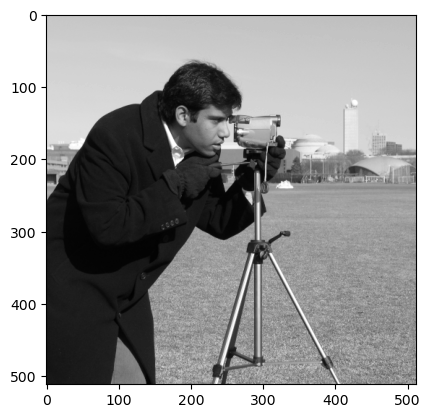

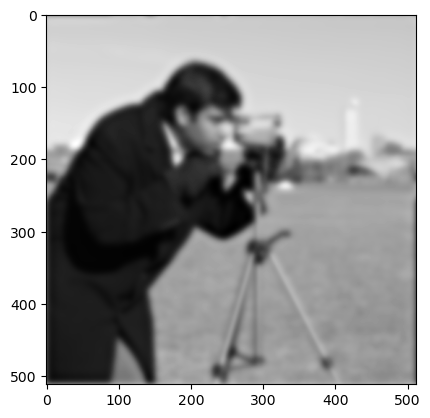

In [25]:
from skimage.filters import butterworth 
from skimage.data import camera, astronaut
import matplotlib.pyplot as plt 


filtered = butterworth(camera(), cutoff_frequency_ratio=0.05, high_pass=False, order=2.0, channel_axis=None)

plt.imshow(camera(), cmap='gray')
plt.show()
plt.imshow(filtered, cmap='gray')

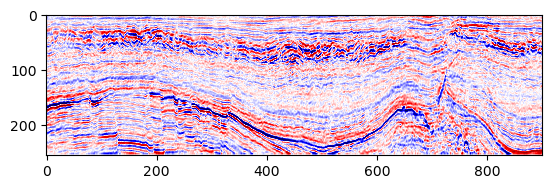

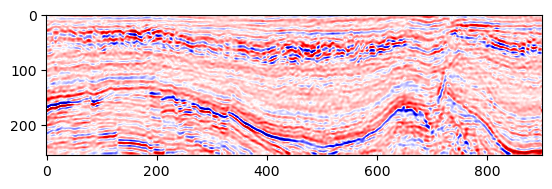

In [26]:
filtered = butterworth(volume_npy[0].T, cutoff_frequency_ratio=0.15, high_pass=False, order=5.0, channel_axis=None)

plt.imshow(volume_npy[0].T, cmap='seismic')
plt.show()
plt.imshow(filtered, cmap='seismic')